<a href="https://colab.research.google.com/github/kj1103/cwiczenia1/blob/main/nr2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import sklearn

sklearn.__version__

'1.5.2'

In [27]:
def fetch_financial_data(company='AMZN'):
    """
    This function fetches stock market quotations.
    """
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq')

df_raw = fetch_financial_data()
df_raw.head()

,Open,High,Low,Close,Volume
Date,,,,,
2024-12-03,210.31,214.02,209.6500,213.44,32214828
2024-12-02,209.96,212.99,209.5101,210.71,39523185
2024-11-29,205.83,208.20,204.5900,207.89,24892447
2024-11-27,206.98,207.64,205.0500,205.74,28061638
2024-11-26,201.90,208.00,201.7900,207.86,41673737


In [74]:
df = df_raw.copy()
baza = df_raw.copy()

df = df[:5]
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5 entries, 2024-12-03 to 2024-11-26
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    5 non-null      float64
 1   High    5 non-null      float64
 2   Low     5 non-null      float64
 3   Close   5 non-null      float64
 4   Volume  5 non-null      int64  
dtypes: float64(4), int64(1)
memory usage: 240.0 bytes


In [54]:
#df = df.reset_index()
##df = df.rename(columns={'index': 'Date'})
#print(df.columns)
##df = df.reset_index()  # Przeniesienie indeksu na kolumnę
#df = df.rename(columns={'index': 'Date'})  # Zmiana nazwy kolumny 'index' na 'Date'
#df = df.loc[:, ~df.columns.duplicated()]
#df['Date'] = pd.to_datetime(df['Date'])



Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []


In [71]:
print(baza.index)
baza = baza.sort_index()
baza_test = baza.loc['2024-01-01':'2024-01-30']
print(baza_test);
print("Min date:", baza.index.min())
print("Max date:", baza.index.max())
baza_test2 = baza_test[(baza_test.index >= '2024-01-05') & (baza_test.index <= '2024-01-15')]
print(baza_test2)


DatetimeIndex(['2019-12-06', '2019-12-09', '2019-12-10', '2019-12-11',
               '2019-12-12', '2019-12-13', '2019-12-16', '2019-12-17',
               '2019-12-18', '2019-12-19',
               ...
               '2024-11-19', '2024-11-20', '2024-11-21', '2024-11-22',
               '2024-11-25', '2024-11-26', '2024-11-27', '2024-11-29',
               '2024-12-02', '2024-12-03'],
              dtype='datetime64[ns]', name='Date', length=1256, freq=None)
              Open     High       Low   Close    Volume
Date                                                   
2024-01-02  151.54  152.380  148.3900  149.93  47339424
2024-01-03  149.20  151.050  148.3300  148.47  49425495
2024-01-04  145.59  147.380  144.0500  144.57  56039807
2024-01-05  144.69  146.590  144.5300  145.24  45153147
2024-01-08  146.74  149.400  146.1500  149.10  46757053
2024-01-09  148.33  151.710  148.2100  151.37  43812567
2024-01-10  152.06  154.420  151.8810  153.73  44421830
2024-01-11  155.04  157.170  15

In [77]:
df.index.month
df.index.day_of_week

Index([1, 0, 4, 2, 1], dtype='int32', name='Date')

In [78]:
df = pd.DataFrame(data={'height': [175., 178.5, 185., 191., 184.5, 183., 168.]})
df

,height
0,175.0
1,178.5
2,185.0
3,191.0
4,184.5
5,183.0
6,168.0


In [79]:
df['height_cat'] = pd.cut(x=df.height, bins=3)
df


,height,height_cat
0,175.0,"(167.977, 175.667]"
1,178.5,"(175.667, 183.333]"
2,185.0,"(183.333, 191.0]"
3,191.0,"(183.333, 191.0]"
4,184.5,"(183.333, 191.0]"
5,183.0,"(175.667, 183.333]"
6,168.0,"(167.977, 175.667]"


In [80]:
df['height_cat'] = pd.cut(x=df.height, bins=(160, 175, 180, 195))
df

,height,height_cat
0,175.0,"(160, 175]"
1,178.5,"(175, 180]"
2,185.0,"(180, 195]"
3,191.0,"(180, 195]"
4,184.5,"(180, 195]"
5,183.0,"(180, 195]"
6,168.0,"(160, 175]"


In [81]:

df['height_cat'] = pd.cut(x=df.height, bins=(160, 175, 180, 195), labels=['small', 'medium', 'high'])
df

,height,height_cat
0,175.0,small
1,178.5,medium
2,185.0,high
3,191.0,high
4,184.5,high
5,183.0,high
6,168.0,small


In [82]:
pd.get_dummies(df, drop_first=True, prefix='height')


,height,height_medium,height_high
0,175.0,False,False
1,178.5,True,False
2,185.0,False,True
3,191.0,False,True
4,184.5,False,True
5,183.0,False,True
6,168.0,False,False


In [83]:
df = pd.DataFrame(data={'lang': [['PL', 'ENG'], ['GER', 'ENG', 'PL', 'FRA'], ['RUS']]})
df

,lang
0,"[PL, ENG]"
1,"[GER, ENG, PL, FRA]"
2,[RUS]


In [ ]:
apply(len) -> długość elementów z listy

In [84]:

df['lang_number'] = df['lang'].apply(len)
df

,lang,lang_number
0,"[PL, ENG]",2
1,"[GER, ENG, PL, FRA]",4
2,[RUS],1


flaga = jeżeli PL to wstaw 1 , jeżeli nie to 0

In [85]:
df['PL_flag'] = df['lang'].apply(lambda x: 1 if 'PL' in x else 0)
df

,lang,lang_number,PL_flag
0,"[PL, ENG]",2,1
1,"[GER, ENG, PL, FRA]",4,1
2,[RUS],1,0


In [90]:
df = pd.DataFrame(data={'website': ['wp.pl', 'onet.pl', 'google.com']})
df.website.str.split('.', expand=True) ## rozdziel po kropce

new = df.website.str.split('.', expand=True)
df['portal'] = new[0]
df['extension'] = new[1]
df

,website,portal,extension
0,wp.pl,wp,pl
1,onet.pl,onet,pl
2,google.com,google,com


ZBIORY TRENINGOWE I TESTOWE

In [91]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns

np.random.seed(42)
np.set_printoptions(edgeitems=30, linewidth=100000,
                    formatter=dict(float=lambda x: f'{x:.2f}'))
sns.set()
sklearn.__version__

'1.5.2'

In [98]:
from sklearn.datasets import load_iris

raw_data = load_iris()
raw_data_copy = raw_data.copy()
raw_data_copy.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [99]:
data = raw_data_copy['data']
target = raw_data_copy['target']

print(f'{data[:5]}\n')
print(target[:5])

[[5.10 3.50 1.40 0.20]
 [4.90 3.00 1.40 0.20]
 [4.70 3.20 1.30 0.20]
 [4.60 3.10 1.50 0.20]
 [5.00 3.60 1.40 0.20]]

[0 0 0 0 0]


In [100]:
all_data = np.c_[data, target]
all_data[:5]

array([[5.10, 3.50, 1.40, 0.20, 0.00],
       [4.90, 3.00, 1.40, 0.20, 0.00],
       [4.70, 3.20, 1.30, 0.20, 0.00],
       [4.60, 3.10, 1.50, 0.20, 0.00],
       [5.00, 3.60, 1.40, 0.20, 0.00]])

In [107]:
df = pd.DataFrame(data=all_data, columns=raw_data.feature_names + ['target'])
df.head()
df.tail()
df.info()
df.describe()
df.describe().T.apply(lambda x: round(x, 2))
df.target.value_counts()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


,count
target,
0.0,50
1.0,50
2.0,50


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


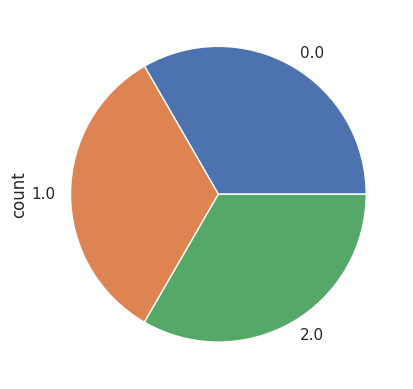

In [109]:
df.target.value_counts().plot(kind='pie')
data = df.copy()
target = data.pop('target')
data.head()

In [110]:
target.head()


,target
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [111]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

print(f'X_train shape {X_train.shape}')
print(f'y_train shape {y_train.shape}')
print(f'X_test shape {X_test.shape}')
print(f'y_test shape {y_test.shape}')
print(f'\nTest ratio: {len(X_test) / len(data):.2f}')
print(f'\ny_train:\n{y_train.value_counts()}')
print(f'\ny_test:\n{y_test.value_counts()}')

X_train shape (112, 4)
y_train shape (112,)
X_test shape (38, 4)
y_test shape (38,)

Test ratio: 0.25

y_train:
target
1.0    39
2.0    38
0.0    35
Name: count, dtype: int64

y_test:
target
0.0    15
2.0    12
1.0    11
Name: count, dtype: int64


In [112]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=42)

print(f'X_train shape {X_train.shape}')
print(f'y_train shape {y_train.shape}')
print(f'X_test shape {X_test.shape}')
print(f'y_test shape {y_test.shape}')
print(f'\nTest ratio: {len(X_test) / len(data):.2f}')
print(f'\ny_train:\n{y_train.value_counts()}')
print(f'\ny_test:\n{y_test.value_counts()}')

X_train shape (105, 4)
y_train shape (105,)
X_test shape (45, 4)
y_test shape (45,)

Test ratio: 0.30

y_train:
target
1.0    37
2.0    37
0.0    31
Name: count, dtype: int64

y_test:
target
0.0    19
1.0    13
2.0    13
Name: count, dtype: int64


In [113]:
X_train, X_test, y_train, y_test = train_test_split(data, target, train_size=0.9, random_state=42)

print(f'X_train shape {X_train.shape}')
print(f'y_train shape {y_train.shape}')
print(f'X_test shape {X_test.shape}')
print(f'y_test shape {y_test.shape}')
print(f'\nTest ratio: {len(X_test) / len(data):.2f}')
print(f'\ny_train:\n{y_train.value_counts()}')
print(f'\ny_test:\n{y_test.value_counts()}')

X_train shape (135, 4)
y_train shape (135,)
X_test shape (15, 4)
y_test shape (15,)

Test ratio: 0.10

y_train:
target
2.0    47
1.0    44
0.0    44
Name: count, dtype: int64

y_test:
target
1.0    6
0.0    6
2.0    3
Name: count, dtype: int64


In [114]:
from sklearn.datasets import load_breast_cancer

raw_data = load_breast_cancer()
raw_data_copy = raw_data.copy()
raw_data_copy.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [115]:
print(raw_data_copy['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 